# Calculating Gradients in JAX

## Different Ways of calculating gradients

### Manual Differentiation

In [ ]:
# Define a simple function
def f(x):
    return x**4 + 12*x + 1/x

In [ ]:
# Manual derivative calculation
def df(x):
    return 4*x**3 + 12 - 1/x**2

x = 11.0
print(f"Function value at x = 11.0: {f(x)}")
print(f"Value of the derivative of the function at x = 11.0: {df(x)}")

Function value at x = 11.0: 14773.09090909091
Value of the derivative of the function at x = 11.0: 5335.99173553719


### Symbolic Differentiation

In [ ]:
import sympy

x = 11.0
# Create a variable
x_sym = sympy.symbols('x')
# Create an expression using the variable
f_sym = f(x_sym)
# Create symbolic derivative
df_sym = sympy.diff(f_sym)
print(f"Symbolic Expression: {f_sym}")
print(f"Symbolic Derivative of the expression: {df_sym}")
# COnvert symbolic expressions into numerical expressions
f = sympy.lambdify(x_sym, f_sym)
print(f"Numerical value of expression: {f(x)}")
df = sympy.lambdify(x_sym, df_sym)
print(f"Numerical value of derivative of function: {df(x)}")

Symbolic Expression: x**4 + 12*x + 1/x
Symbolic Derivative of the expression: 4*x**3 + 12 - 1/x**2
Numerical value of expression: 14773.09090909091
Numerical value of derivative of function: 5335.99173553719


### Numerical Differentiation

In [ ]:
x = 11.0
dx = 1e-6
df_x_numeric = (f(x+dx)-f(x))/dx
print(df_x_numeric)

5335.992456821259


### AutoDiff(Automatic Differentiation)

In [ ]:
import jax
df = jax.grad(f)
print(df(x))

5335.9917


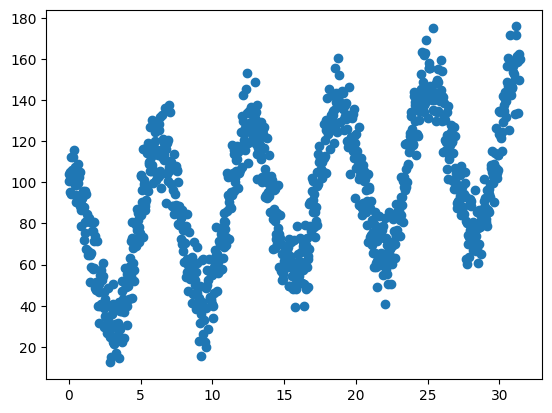

In [ ]:
# Generate data for a sample regression problem
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10*np.pi, num=1000)
e = np.random.normal(scale=10.0, size=x.size)
y = 65.0 + 1.8*x + 40*np.cos(x) + e

plt.scatter(x, y)

In [ ]:
# Calculating Gradients in TensorFlow
import tensorflow as tf

xt = tf.constant(x, dtype=tf.float32)
yt = tf.constant(y, dtype=tf.float32)

learning_rate = 1e-2

w = tf.Variable(1.0, trainable=True)
b = tf.Variable(1.0, trainable=True)

def model(x):
    return w * x + b

def loss_fn(prediction, y):
    return tf.reduce_mean(tf.square(prediction-y))

with tf.GradientTape() as tape:
    prediction = model(x)
    loss = loss_fn(prediction, y)

dw, db = tape.gradient(loss, [w, b])

w.assign_sub(learning_rate * dw)
b.assign_sub(learning_rate * db)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.5293589>

In [ ]:
# Calculating Gradients in PyTorch
import torch

xt = torch.tensor(x)
yt = torch.tensor(y)

learning_rate = 1e-2

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def model(x):
    return w * x + b

def loss_fn(prediction, y):
    return ((prediction-y)**2).mean()

prediction = model(xt)
loss = loss_fn(prediction, yt)

loss.backward()

with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
# Calculating Gradients in JAX
import jax
import jax.numpy as jnp

xt = jnp.array(x)
yt = jnp.array(y)

learning_rate = 1e-2

model_parameters = jnp.array([1., 1.])

def model(theta, x):
    w, b = theta
    return w * x + b

def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)
    return jnp.mean((prediction-y)**2)

grads_fn = jax.grad(loss_fn)
grads = grads_fn(model_parameters, xt, yt)
model_parameters -= learning_rate * grads

### Minkowski DIstance

$D(X, Y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$


In [ ]:
# Minkowski distance
def minkowski_dist(order, x, y):
    return jnp.power(jnp.sum(jnp.abs(x-y)**order), 1.0/order)

In [ ]:
# Calculate derivative of minkowski distance w.r.t x(second argument)
dist_d_x = jax.grad(minkowski_dist, argnums=1)
dist_d_x(1, jnp.array([1.0,1.0,1.0]), jnp.array([2.0,2.0,2.0]))

Array([-1., -1., -1.], dtype=float32)

In [ ]:
# Calulate deivative w.r.t x and y(second and third argument)
dist_d_xy = jax.grad(minkowski_dist, argnums=(1,2))
dist_d_xy(1, jnp.array([1.0,1.0,1.0]), jnp.array([2.0,2.0,2.0]))

(Array([-1., -1., -1.], dtype=float32), Array([1., 1., 1.], dtype=float32))

### Differentiating w.r.t dictionary

In [ ]:
model_parameters = {
    'w': jnp.array([1.]),
    'b': jnp.array([1.])
    }
def model(param_dict, x):
    w, b = param_dict['w'], param_dict['b']
    return w * x + b
def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)
    return jnp.mean((prediction-y)**2)
grads_fn = jax.grad(loss_fn)
grads = grads_fn(model_parameters, xt, yt)
grads

{'b': Array([-152.93588], dtype=float32),
 'w': Array([-2520.919], dtype=float32)}

### Returning auxiliary value

In [ ]:
model_parameters = jnp.array([1., 1.])

def model(theta, x):
    w, b = theta
    return w * x + b

def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)
    return jnp.mean((prediction-y)**2), prediction

grads_fn = jax.grad(loss_fn, has_aux=True)
grads, preds  = grads_fn(model_parameters, xt, yt)
model_parameters -= learning_rate * grads

In [ ]:
# Returning both auxiliary value and gradient
model_parameters = jnp.array([1., 1.])

def model(theta, x):
    w, b = theta
    return w * x + b

def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)
    return jnp.mean((prediction-y)**2), prediction

grads_fn = jax.value_and_grad(loss_fn, has_aux=True)
(loss, preds), grads  = grads_fn(model_parameters, xt, yt)
model_parameters -= learning_rate * grads

In [ ]:
print(loss)

6772.245


### Stopping Gradient Flow

In [ ]:
def f(x, y):
  return x**2 + jax.lax.stop_gradient(y**2)

jax.grad(f, argnums=(0,1))(1.0, 1.0)

(Array(2., dtype=float32, weak_type=True),
 Array(0., dtype=float32, weak_type=True))

### Finding Higher Order Derivatives

In [ ]:
def f(x):
    return x**4 + 12*x + 1/x

f_d1 = jax.grad(f)
f_d2 = jax.grad(f_d1)
f_d3 = jax.grad(f_d2)

x = 11.0

print(f_d1(x))
print(f_d2(x))
print(f_d3(x))

5335.9917
1452.0015
263.9996


In [ ]:
# Combining transformations
f_d3 = jax.grad(jax.grad(jax.grad(f)))
f_d3(x)

Array(263.9996, dtype=float32, weak_type=True)

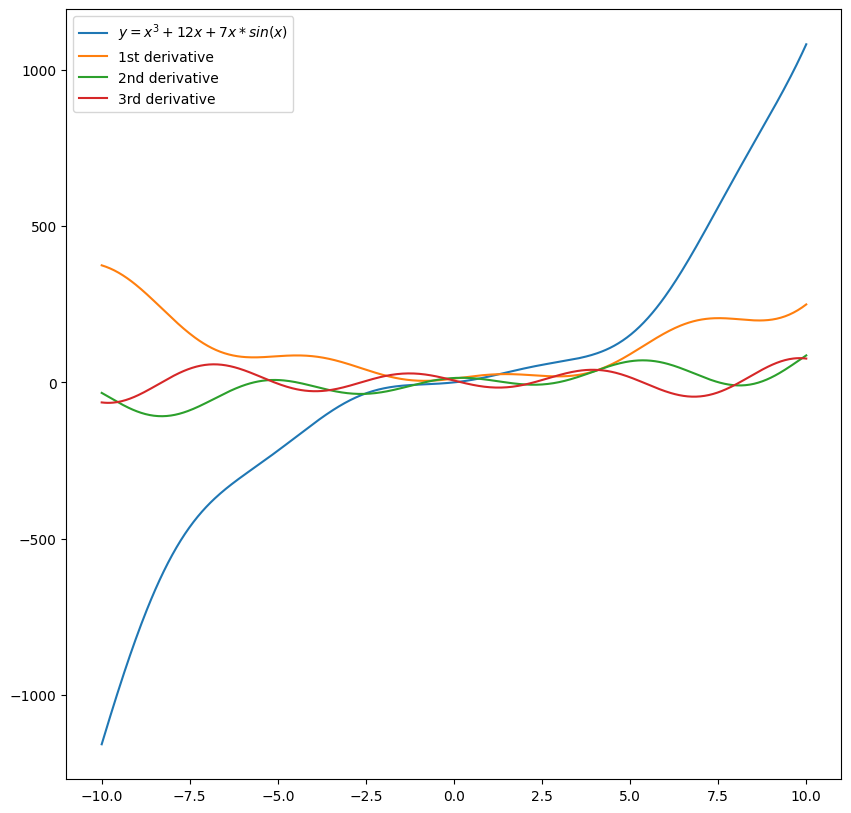

In [ ]:
# Plotting higher order derivatives
def f(x):
    return x**3 + 12*x + 7*x*jnp.sin(x)

x = np.linspace(-10, 10, num=500)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, f(x), label = r"$y = x^3 + 12x + 7x*sin(x)$")

df = f
for d in range(3):
  df = jax.grad(df)
  ax.plot(x, jax.vmap(df)(x), label=f"{['1st','2nd','3rd'][d]} derivative")
  ax.legend()

## Multivariable Case

### Jacobian

In [ ]:
import jax
import jax.numpy as jnp

def f(x):
  return [
      x[0]**2 + x[1]**2 - x[1]*x[2],
      x[0]**2 - x[1]**2 + 3*x[0]*x[2]
  ]

print(f"Reverse AutoDiff for Jacobian: {jax.jacrev(f)(jnp.array([3.0, 4.0, 5.0]))}")
print(f"Forward Autodiff for Jacobian: {jax.jacfwd(f)(jnp.array([3.0, 4.0, 5.0]))}")

Reverse AutoDiff for Jacobian: [Array([ 6.,  3., -4.], dtype=float32), Array([21., -8.,  9.], dtype=float32)]
Forward Autodiff for Jacobian: [Array([ 6.,  3., -4.], dtype=float32), Array([21., -8.,  9.], dtype=float32)]


In [ ]:
%timeit -n 100 jax.jacrev(f)(jnp.array([3.0, 4.0, 5.0]))

25.4 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 jax.jacfwd(f)(jnp.array([3.0, 4.0, 5.0]))

13.7 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Hessian

In [ ]:
# Calculate Hessian of a function
def f(x):
  return x[0]**2 - x[1]**2 + 3*x[0]*x[2]
jax.hessian(f)(jnp.array([3.0, 4.0, 5.0]))

Array([[ 2.,  0.,  3.],
       [ 0., -2.,  0.],
       [ 3.,  0.,  0.]], dtype=float32)

In [ ]:
# Hessian as Jacobian of the gradient
def hessian(f):
    return jax.jacfwd(jax.grad(f))
def hessian(f):
    return jax.jacfwd(jax.jacrev(f))

## Automatic Differentiation in Depth